# grayscale method

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


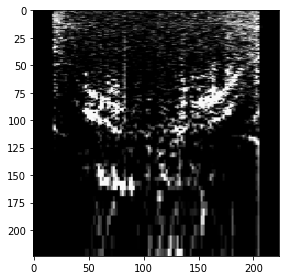

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from sklearn.decomposition import PCA

image = imread('/content/drive/MyDrive/HARP_DATASET/1_day_image/square_images_size224/Full U-shape Hartinger/THE_stft_20081110_20081111_dynamic.png', as_gray=True)
imshow(image)

In [8]:
features = np.reshape(image, (224,224))

features.shape, features

((224, 224), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [9]:
    pca = PCA(n_components=32, random_state=22)
    pca.fit(features)
    X_reduced_features_gray = pca.transform(features)

In [14]:
X_reduced_features_gray.shape, X_reduced_features_gray

((224, 32), array([[ 0.15385458,  1.84893483,  0.61124848, ..., -0.12874153,
          0.17908622,  0.05121336],
        [ 0.34786075,  1.99942275,  0.99240436, ...,  0.05522639,
         -0.24973309,  0.19236396],
        [ 0.52855674,  2.19470456,  0.83175456, ...,  0.37200812,
         -0.14514295,  0.02626707],
        ...,
        [-0.93223269, -1.01512489,  0.16493319, ..., -0.1571746 ,
          0.01509586, -0.11884857],
        [-0.93223269, -1.01512489,  0.16493319, ..., -0.1571746 ,
          0.01509586, -0.11884857],
        [-0.93223269, -1.01512489,  0.16493319, ..., -0.1571746 ,
          0.01509586, -0.11884857]]))

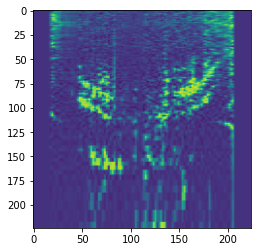

In [11]:
temp = pca.inverse_transform(X_reduced_features_gray) 
temp = np.reshape(temp, (224,224))
plt.imshow(temp)

In [16]:
X_reduced_features_gray = X_reduced_features_gray.reshape(-1,224*32)
print(X_reduced_features_gray.shape)  

(1, 7168)


# Mean pixel value of channels

In [1]:
image = imread('/content/drive/MyDrive/HARP_DATASET/1_day_image/square_images_size224/Full U-shape Hartinger/THE_stft_20081110_20081111_dynamic.png')
feature_matrix = np.zeros((224,224)) 
feature_matrix.shape



NameError: ignored

In [ ]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)

[0. 0. 0. ... 0. 0. 0.]


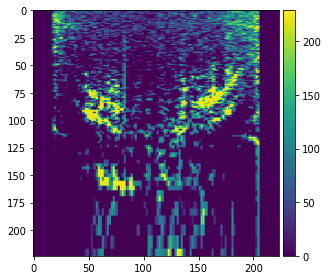

In [ ]:
features = np.reshape(feature_matrix, (224*224))
print(features)
features.shape
imshow(feature_matrix)

# Edge features

(224, 224)
[0. 0. 0. ... 0. 0. 0.]


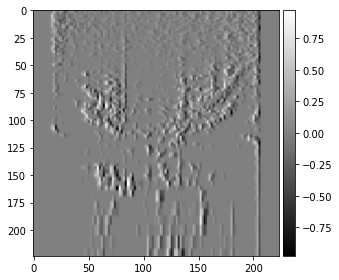

In [ ]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
image = imread('/content/drive/MyDrive/HARP_DATASET/1_day_image/square_images_size224/Full U-shape Hartinger/THE_stft_20081110_20081111_dynamic.png',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

print(edges_prewitt_vertical.shape)

features = np.reshape(edges_prewitt_vertical, (224*224))
print(features)

imshow(edges_prewitt_vertical, cmap='gray')


# Feature extractor